## BOARD INFINITY    Decode 10.1 < Mega_Hackathon >

#### Category 3 - Data Science & ML

#### Problem Statement NLP analysis and metrics for customer reviews.


 ## TOPIC OF MY HAKATHON  IS :  Trip Advisor Hotel reviews Sentiment Analysis
 
 ##  Prepared by : Kumar Ankit
 
 ##  Batch : DS20NOV01

In [1]:
! pip install nltk
! pip install wordcloud

In [2]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import re

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [3]:
pd.read_csv(r'E:\tripadvisor_hotel_reviews.csv')

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
hotel_reviews = pd.read_csv(r'E:\tripadvisor_hotel_reviews.csv')

In [6]:
hotel_reviews.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


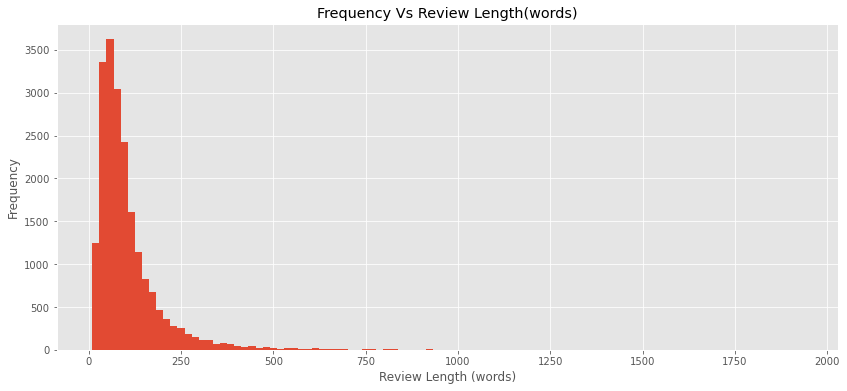

In [7]:
## Getting the number of words by splitting them by a space
words_per_review = hotel_reviews.Review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.title('Frequency Vs Review Length(words)')
plt.show()

In [8]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 106.3750427016739
Skewness: 4.495935249170961


In [9]:
percent_val = 100 * hotel_reviews['Rating'].value_counts()/len(hotel_reviews)
percent_val

5    44.185252
4    29.471475
3    10.658338
2     8.750183
1     6.934752
Name: Rating, dtype: float64

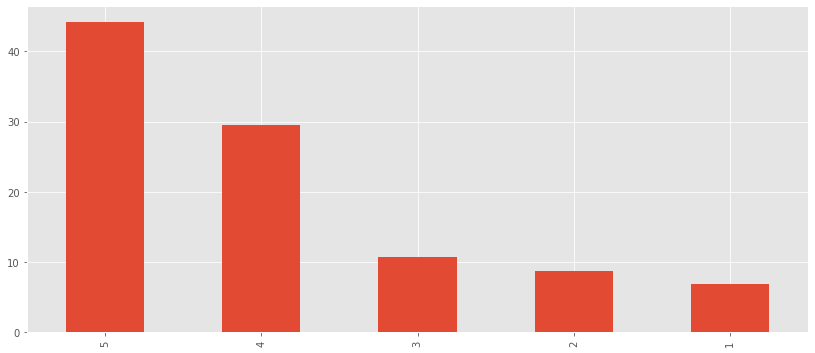

In [10]:
percent_val.plot.bar()
plt.show()

In [11]:
# Mapping the ratings
hotel_reviews['Sentiment_rating'] = np.where(hotel_reviews.Rating > 3,1,0)

## Removing neutral reviews 
hotel_reviews = hotel_reviews[hotel_reviews.Rating != 3]

# Printing the counts of each class
hotel_reviews['Sentiment_rating'].value_counts()

1    15093
0     3214
Name: Sentiment_rating, dtype: int64

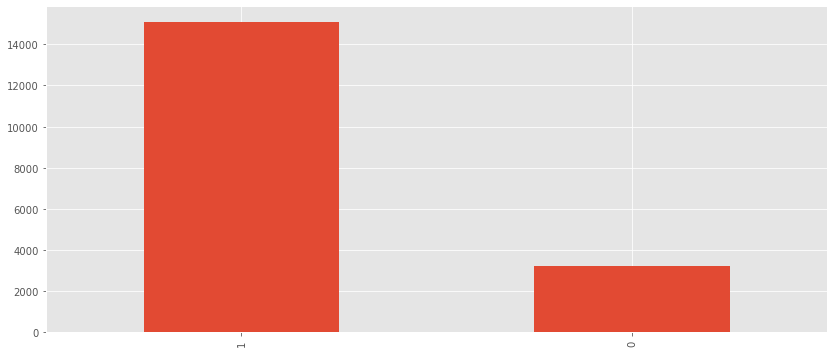

In [12]:
hotel_reviews.Sentiment_rating.value_counts().plot.bar()
plt.show()

In [ ]:
final_words=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in text_words:
    if word not in stopwords:
        final_words.append(word)

### Pre-processing
1. Converting words to lower/upper case
2. Removing special characters
3. Removing stopwords and high/low-frequency words
4. Stemming/lemmatization

 ### 1. Converting words to lower/upper case

In [13]:
hotel_reviews['reviews_text_new'] = hotel_reviews['Review'].str.lower()

### word tokenization

In [16]:
from nltk import word_tokenize

# Word tokenization example:
word_tokenize("DPhi Bootcamp rules. It is awesome :D")

['DPhi', 'Bootcamp', 'rules', '.', 'It', 'is', 'awesome', ':', 'D']

In [17]:
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in hotel_reviews['Review']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in hotel_reviews['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  79301
Number of unique tokens now:  79301


### POS

In [18]:
nltk.pos_tag(tokens_lower[:10])

[('nice', 'JJ'),
 ('hotel', 'NN'),
 ('expensive', 'JJ'),
 ('parking', 'NN'),
 ('got', 'VBD'),
 ('good', 'JJ'),
 ('deal', 'NN'),
 ('stay', 'VB'),
 ('hotel', 'NN'),
 ('anniversary', 'NN')]

In [19]:
tagged_words= nltk.pos_tag(tokens_lower)

In [20]:
from nltk.corpus import sentiwordnet as swn, wordnet as wn
from nltk.corpus import wordnet

In [21]:
def analyze_sentiment_sentiwordnet_lexicon(tokens_lower, verbose=False):

    # tokenize and POS tag text tokens
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_words:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1
    
    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0.05 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']], 
                                                             labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        display(sentiment_frame)
        
    return final_sentiment

### 2. Removing special characters

In [22]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = hotel_reviews['reviews_text_new'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{"'",
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 '=',
 '\\',
 '_',
 '`',
 '|',
 '~',
 '\x81',
 '\x82',
 '\x85',
 '\x8a',
 '\x8c',
 '\x8d',
 '\x8e',
 '\x8f',
 '\x90',
 '\x91',
 '\x93',
 '\x94',
 '\x95',
 '\x96',
 '\x99',
 '\x9d',
 '\xa0',
 '¢',
 '£',
 '©',
 '«',
 '±',
 '´'}

In [23]:
review_backup = hotel_reviews['reviews_text_new'].copy()
hotel_reviews['reviews_text_new'] = hotel_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9]+', ' ')

In [24]:
print("- Old Review -")
print(review_backup.values[7])
print("\n- New Review -")
print(hotel_reviews['reviews_text_new'][8])

- Old Review -
hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block away, today green, bravo, 1 double bed room room bed couch separated curtain, snoring mom slept curtain, great food nearby,  

- New Review -
hotel stayed hotel monaco cruise rooms generous decorated uniquely hotel remodeled pacific bell building charm sturdiness everytime walked bell men felt like coming home secure great single travelers location fabulous walk things pike market space needle little grocery drug store block away today green bravo 1 double bed room room bed couch separated curtain snoring mom slept curtain great food nearby 


In [25]:
hotel_reviews.head(5)

,Review,Rating,Sentiment_rating,reviews_text_new
0,nice hotel expensive parking got good deal sta...,4,1,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,0,ok nothing special charge diamond member hilto...
3,"unique, great stay, wonderful time hotel monac...",5,1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,1,love monaco staff husband stayed hotel crazy w...


### 3. Removing stop words

In [26]:
from nltk.corpus import stopwords

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [27]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = hotel_reviews['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night 

-- Stopwords in the sentence --
 ['did', 'not', 'just', 'did', 'not', 'having']

-- Non-stopwords in the sentence --
 ['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non', 'existent', 'view', 'room',

In [29]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

hotel_reviews['reviews_text_nonstop'] = hotel_reviews['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
hotel_reviews[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
3,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
...,...,...
20486,best kept secret 3rd time staying charm not 5 ...,"[best, kept, secret, 3rd, time, staying, charm..."
20487,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q..."
20488,ok just looks nice modern outside desk staff n...,"[ok, looks, nice, modern, outside, desk, staff..."
20489,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened..."


In [30]:
print("- Old Review -")
print(hotel_reviews['reviews_text_new'][6])
print("\n- New Review -")
print(hotel_reviews['reviews_text_nonstop'][6])

- Old Review -
cozy stay rainy city husband spent 7 nights monaco early january 2008 business trip chance come ride we booked monte carlo suite proved comfortable longish stay room 905 located street building street noise not problem view interesting rooms building look dank alley midsection large office building suite comfortable plenty room spread bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas lots comfortable seating options good lighting plenty storage clothing luggage hotel staff friendly efficient housekeeping staff did great job pleasant requests responded quickly the location quite good easy walk pike street market seattle art museum notch shopping dining options a positive experience 

- New Review -
['cozy', 'stay', 'rainy', 'city', 'husband', 'spent', '7', 'nights', 'monaco', 'early', 'january', '2008', 'business', 'trip', 'chance', 'come', 'ride', 'booked', 'monte', 'carlo', 'suite', 'proved', 'comfortable', 'longish', 'stay',

### Stemming & lemmatization

In [31]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
# First Word tokenization
nltk_tokens = word_tokenize(word_data)
#Next find the roots of the word
for w in nltk_tokens:
       print ("Actual: %s  Stem: %s"  % (w,porter_stemmer.stem(w)))

Actual: It  Stem: It
Actual: originated  Stem: origin
Actual: from  Stem: from
Actual: the  Stem: the
Actual: idea  Stem: idea
Actual: that  Stem: that
Actual: there  Stem: there
Actual: are  Stem: are
Actual: readers  Stem: reader
Actual: who  Stem: who
Actual: prefer  Stem: prefer
Actual: learning  Stem: learn
Actual: new  Stem: new
Actual: skills  Stem: skill
Actual: from  Stem: from
Actual: the  Stem: the
Actual: comforts  Stem: comfort
Actual: of  Stem: of
Actual: their  Stem: their
Actual: drawing  Stem: draw
Actual: rooms  Stem: room


In [32]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
nltk_tokens = nltk.word_tokenize(word_data)
for w in nltk_tokens:
       print ("Actual: %s  Lemma: %s"  % (w,wordnet_lemmatizer.lemmatize(w)))

Actual: It  Lemma: It
Actual: originated  Lemma: originated
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: idea  Lemma: idea
Actual: that  Lemma: that
Actual: there  Lemma: there
Actual: are  Lemma: are
Actual: readers  Lemma: reader
Actual: who  Lemma: who
Actual: prefer  Lemma: prefer
Actual: learning  Lemma: learning
Actual: new  Lemma: new
Actual: skills  Lemma: skill
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: comforts  Lemma: comfort
Actual: of  Lemma: of
Actual: their  Lemma: their
Actual: drawing  Lemma: drawing
Actual: rooms  Lemma: room


### Building a machine learning model

In [33]:
hotel_reviews[['Review','Rating','Sentiment_rating']].head(5)

,Review,Rating,Sentiment_rating
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
5,love monaco staff husband stayed hotel crazy w...,5,1


###  n-grams

In [37]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


### Bag-of-words

In [38]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(hotel_reviews['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,0001,000hope,000rp,000rupiah,000sf,000us,000year,0030,...,zurich,zvago,zwolle,zyrtec,zytec,zz,zzzt,zzzzt,zzzzzs,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(hotel_reviews['reviews_text_new'])

In [40]:
bow_data

<18307x48924 sparse matrix of type '<class 'numpy.int64'>'
	with 1551212 stored elements in Compressed Sparse Row format>

## Divide into training and test sets:

In [41]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    hotel_reviews['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [42]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.820863
0    0.179137
Name: Sentiment_rating, dtype: float64

## Applying logistic regression

In [43]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9724983432736912


In [44]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(hotel_reviews.reviews_text_new)

In [45]:
# Notice the increase in features with inclusion of n-grams
bow_data

<18307x4468233 sparse matrix of type '<class 'numpy.int64'>'
	with 7271229 stored elements in Compressed Sparse Row format>

In [46]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    hotel_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [47]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9744855967078189


## TF-IDF model

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(hotel_reviews['reviews_text_new'])

In [49]:
tfidf_data

<18307x48924 sparse matrix of type '<class 'numpy.float64'>'
	with 1551212 stored elements in Compressed Sparse Row format>

In [51]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            hotel_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [52]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9710831563470022
